In [1]:
"""This script has following capabilities:
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import shutil
import re

In [2]:
def Morse_pot(Do, frac, alpha, ro, r):
    "frac = fraction of Do"
    D = Do*frac
    return D*(np.exp(-2*alpha*(r-ro)) - 2*np.exp(-alpha*(r-ro)))

plt.rcParams.update({'font.serif':'Arial', 'font.size': 18.0, 
                     'xtick.labelsize': 15, 'ytick.labelsize': 15,
                    'legend.fontsize':15,
                    'figure.dpi': 80.0, 'figure.figsize': [5, 4]})

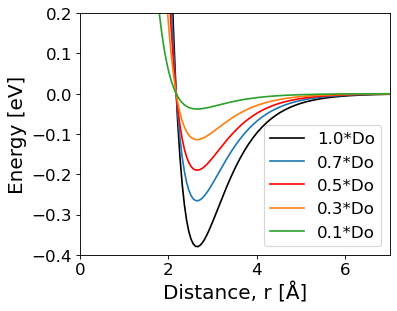

In [3]:
# Non-bonded: Morse Au-S
r = np.linspace(0, 10, 200)
alpha = 1.47               # Ang-1
ro=2.65                    #Ang
plt.plot(r, Morse_pot(0.38, 1, alpha, ro, r), 'k', label='1.0*Do')
plt.plot(r, Morse_pot(0.38, 0.7, alpha, ro, r), label='0.7*Do')
plt.plot(r, Morse_pot(0.38, 0.5, alpha, ro, r), 'r',label='0.5*Do')
plt.plot(r, Morse_pot(0.38, 0.3, alpha, ro, r), label='0.3*Do')
plt.plot(r, Morse_pot(0.38, 0.1, alpha, ro, r), label='0.1*Do')
plt.xlim(0, 7)
plt.ylim(-0.4, 0.2)
# plt.axvline(2.65, color='b', ls='--')
# plt.yscale('log')
plt.xlabel("Distance, r [Å]")
plt.ylabel("Energy [eV]")
plt.legend(loc='lower right')
# plt.savefig("./Force_field_plot/Morse_forcefield_bond_density.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

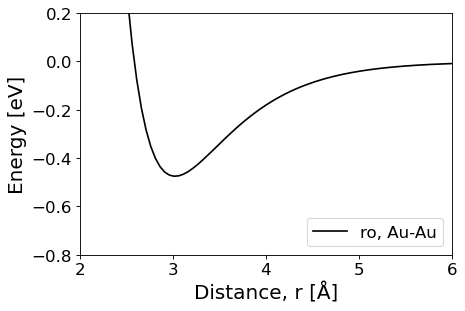

In [5]:
#Non-bonded: Au-Au
fig = plt.figure(figsize=(6,4))
plt.plot(r, Morse_pot(0.475, 1, 1.583, 3.0242, r), 'k', label='ro, Au-Au')
# plt.plot(r, Morse_pot(0.475, 1, 1.583, 1.05*3.0242, r), 'r', label='1.05*ro, Au-Au')
# plt.plot(r, Morse_pot(0.475*1.05, 1, 1.583, 3.0242, r), 'r', label='1.05*Do, Au2-Au2')
# plt.plot(r, Morse_pot((0.475*1.05+0.475)/2, 1, 1.583, 3.0242, r), 'r--', label='1.025*Do, Au1-Au2')
# plt.plot(r, Morse_pot(0.475*1.2, 1, 1.583, 3.0242, r), 'g',label='1.2*Do, Au2-Au2')
# plt.plot(r, Morse_pot((0.475*1.2+0.475)/2, 1, 1.583, 3.0242, r), 'g--',label='1.1*Do, Au1-Au2')
# plt.plot(r, Morse_pot(0.475*1.5, 1, 1.583, 3.0242, r), 'm',label='1.5*Do, Au2-Au2')
# plt.plot(r, Morse_pot(0.475*1.25, 1, 1.583, 3.0242, r), 'm--',label='1.25*Do, Au1-Au2')
# plt.plot(r, Morse_pot(0.38, 1, 1.47, 2.65, r), 'r', label='Au-S')
plt.xlim(2, 6)
plt.ylim(-0.8, 0.2)
# plt.axvline(2.65, color='b', ls='--')
# plt.yscale('log')
plt.xlabel("Distance, r [Å]")
plt.ylabel("Energy [eV]")
plt.legend(loc='lower right')
plt.savefig("./Force_field_plot/Au-Au_Morse_forcefield.png", dpi= 100, bbox_inches = 'tight', facecolor="w")
plt.show()

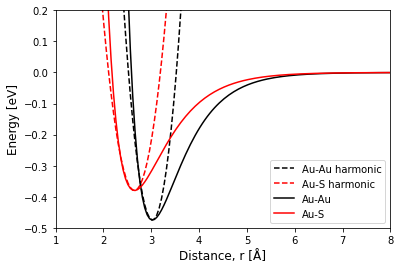

In [5]:
#Non-bonded: Au-Au

plt.plot(r, 1.9*(r-3.0242)**2-.475, 'k--', label='Au-Au harmonic')
plt.plot(r, 1.3*(r-2.65)**2-.38, 'r--', label='Au-S harmonic')
plt.plot(r, Morse_pot(0.475, 1, 1.583, 3.0242, r), 'k', label='Au-Au')
plt.plot(r, Morse_pot(0.38, 1, 1.47, 2.65, r), 'r', label='Au-S')
plt.xlim(1, 8)
plt.ylim(-0.5, 0.2)
# plt.axvline(2.65, color='b', ls='--')
# plt.yscale('log')
plt.xlabel("Distance, r [Å]", fontsize=12)
plt.ylabel("Energy [eV]", fontsize=12)
plt.legend(loc='lower right')
plt.savefig("./Force_field_plot/Morse_forcefield_harmonic_anharmonic.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

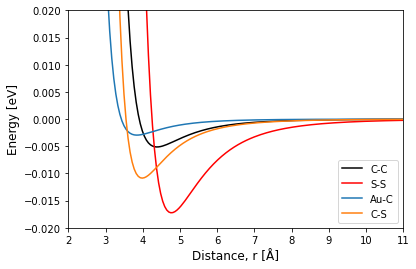

In [6]:
#Non-bonded: LJ
r = np.linspace(0.1, 11, 200)

def LJ_pot(eps, sigma, r):
    return 4*eps*((sigma/r)**12-(sigma/r)**6)

plt.plot(r, LJ_pot(0.00513, 3.905,  r), 'k', label='C-C')
plt.plot(r, LJ_pot(0.01724, 4.250,  r), 'r', label='S-S')
plt.plot(r, LJ_pot(0.00295, 3.424,  r), label='Au-C')
plt.plot(r, LJ_pot(0.01086, 3.550,  r), label='C-S')
plt.xlim(2, 11)
plt.ylim(-0.02, .02)
# plt.axvline(2.65, color='b', ls='--')
# plt.yscale('log')
plt.xlabel("Distance, r [Å]", fontsize=12)
plt.ylabel("Energy [eV]", fontsize=12)
plt.legend(loc='lower right')
plt.savefig("./Force_field_plot/LJ_forcefield.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

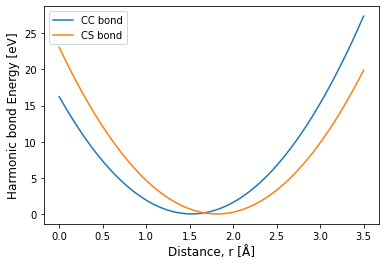

In [7]:
# Harmonic bonds:
r = np.linspace(0, 3.5, 200)
r0 = 1.523                   # Ang
CC_bond = 7.00112*(r-1.523)**2
CS_bond = 7.00112*(r-1.815)**2
plt.plot(r, CC_bond, label='CC bond')
plt.plot(r, CS_bond, label='CS bond')
plt.xlabel("Distance, r [Å]", fontsize=12)
plt.ylabel("Harmonic bond Energy [eV]", fontsize=12)
plt.legend()
plt.savefig("./Force_field_plot/Bonded_Harmonic_bond.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

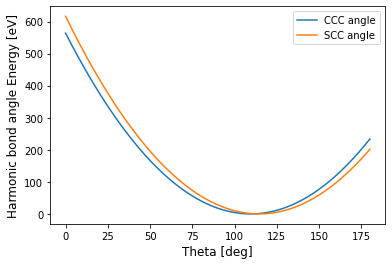

In [8]:
# Harmonic angle:
theta = np.linspace(0, 180, 200)

CCC_angle = 2.694*np.pi*(theta-109.5)**2/180
SCC_angle = 2.694*np.pi*(theta-114.5)**2/180
plt.plot(theta, CCC_angle, label='CCC angle')
plt.plot(theta, SCC_angle, label='SCC angle')
plt.xlabel("Theta [deg]", fontsize=12)
plt.ylabel("Harmonic bond angle Energy [eV]", fontsize=12)
plt.legend()
plt.savefig("./Force_field_plot/Bonded_Harmonic_angle.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

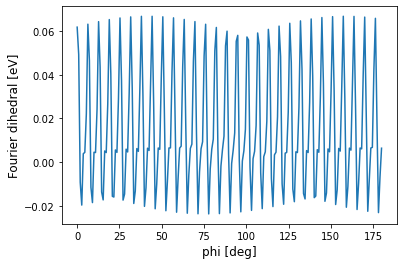

In [9]:
# Dihedral angle:
# CCCC, SCCC 
def dihedral_ene(phi, K, n, d):
    return K*(1+np.cos(n*phi-d))

#CCCC
phi = np.linspace(0, 180, 200)
CCCC = dihedral_ene(phi, 0.03469, 1, 0)+dihedral_ene(phi, -0.0188, 2, 180)
+dihedral_ene(phi, 0.07025, 3, 0) 
# plt.plot(phi, dihedral_ene(phi, 0.03469, 1, 0), label='CCCC-1')
# plt.plot(phi, dihedral_ene(phi, -0.0188, 2, 180), label='CCCC-2')
# plt.plot(phi, dihedral_ene(phi, 0.07025, 3, 0), label='CCCC-3')
plt.plot(phi,CCCC)

plt.xlabel("phi [deg]", fontsize=12)
plt.ylabel("Fourier dihedral [eV]", fontsize=12)
plt.savefig("./Force_field_plot/Bonded_Fourier_dihedral.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()